# Regression using Neural Network

## Q1. 주어진 데이터의 test set에 대해 Loss가 0.022 이하가 되도록 Neural Network를 만들고 hyper parameter를 설정하시오.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
# 데이터 생성
np.random.seed(327)
xy = np.random.uniform(-1,1,(10000,2))
z = - 3 * xy[:,0]**2 + 2 * xy[:,1]**2 + 2*np.sin(2*np.pi*xy[:,0]) + 1.0 + 0.5 * np.random.rand(len(xy))

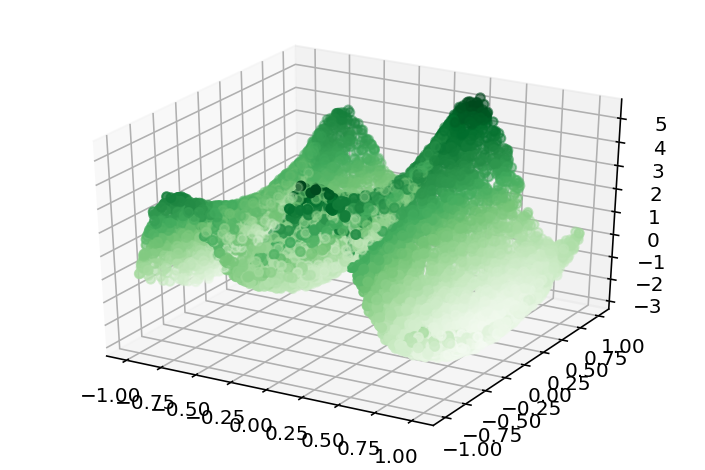

In [3]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(xy[:,0], xy[:,1], z, c=z, cmap='Greens');

In [4]:
# 데이터 나누기 (training set, test set)
from sklearn.model_selection import train_test_split
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.2, random_state=624)

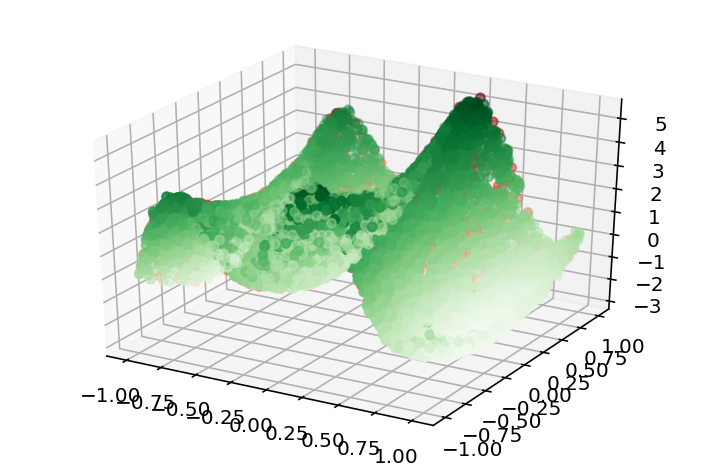

In [5]:
ax = plt.axes(projection='3d')
ax.scatter3D(xy_train[:,0], xy_train[:,1], z_train, c=z_train, cmap='Greens');
ax.scatter3D(xy_test[:,0], xy_test[:,1], z_test, c=z_test, cmap='Reds');

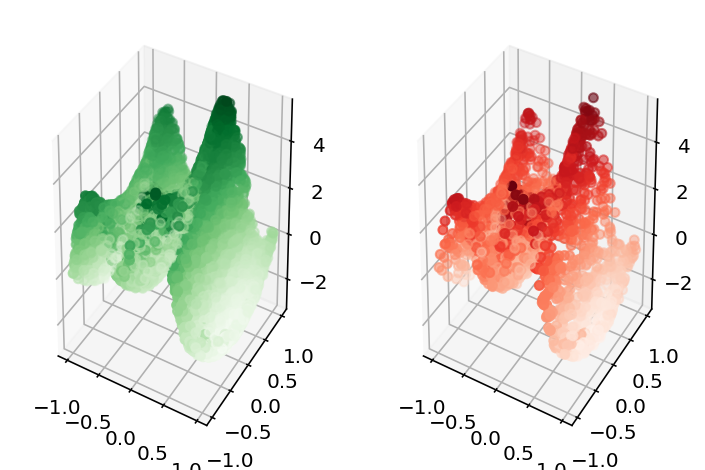

In [6]:
fig = plt.figure()
ax=fig.add_subplot(1,2,1, projection='3d')
ax.scatter3D(xy_train[:,0], xy_train[:,1], z_train, c=z_train, cmap='Greens');
ax=fig.add_subplot(1,2,2, projection='3d')
ax.scatter3D(xy_test[:,0], xy_test[:,1], z_test, c=z_test, cmap='Reds');

In [7]:
# input 값 생성
features = np.array([[xval, yval] for xval, yval in xy_train])
features_test = np.array([[xval, yval] for xval, yval in xy_test])

In [8]:
# Nueral Network
num_hidden1 = 10
# ... 필요 시 hidden layer 추가

x = tf.placeholder(tf.float32, shape=(None,2))

W1 = tf.Variable(tf.random_normal([2, num_hidden1], seed=624))
b1 = tf.Variable(tf.random_normal([num_hidden1], seed=624))
    
W_out = tf.Variable(tf.random_normal([num_hidden1, 1], seed=624))
b_out = tf.Variable(tf.random_normal([1], seed=624))

hidden1 = tf.nn.sigmoid(tf.matmul(x,W1) + b1)

yhat = tf.matmul(hidden1, W_out) + b_out

In [9]:
# loss
y = tf.placeholder(tf.float32, shape=(None,1))
loss = tf.reduce_mean(tf.square(yhat - y))

In [10]:
# hyper parameter tuning
MaxEpoch = 100
batch_size = 200
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

In [11]:
np.random.seed(320)
shuffled_id = np.arange(0,len(xy_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = z_train[shuffled_id]

from helper import generate_batches

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 10 == 0:
            curr_loss = sess.run(loss,feed_dict={x:features,y:z_train.reshape(-1,1)})
            print('epoch: {}, loss: {}'.format(epoch,curr_loss))
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch.reshape(-1,1)})
                            
    final_loss, pred = sess.run([loss,yhat], feed_dict={x:features_test,
                                                       y:z_test.reshape(-1,1)})

    print('test loss: {}'.format(final_loss))

epoch: 0, loss: 6.447195529937744
epoch: 10, loss: 0.4037844240665436
epoch: 20, loss: 0.04225664958357811
epoch: 30, loss: 0.027711044996976852
epoch: 40, loss: 0.024063194170594215
epoch: 50, loss: 0.024020619690418243
epoch: 60, loss: 0.02501123771071434
epoch: 70, loss: 0.024010082706809044
epoch: 80, loss: 0.023836538195610046
epoch: 90, loss: 0.023733092471957207
test loss: 0.024326277896761894


# Classification using Neural Network

## Q2. MNIST 데이터에 대해 95% 이상의 정확도가 나오도록 Neural Network를 만들고 hyper parameter를 설정하시오.

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [13]:
from collections import Counter
freq = Counter([np.argmax(label) for label in mnist.train.labels])
for k in range(0,10):
    print("label {0} : {1}개".format(k, freq[k]))

label 0 : 5444개
label 1 : 6179개
label 2 : 5470개
label 3 : 5638개
label 4 : 5307개
label 5 : 4987개
label 6 : 5417개
label 7 : 5715개
label 8 : 5389개
label 9 : 5454개


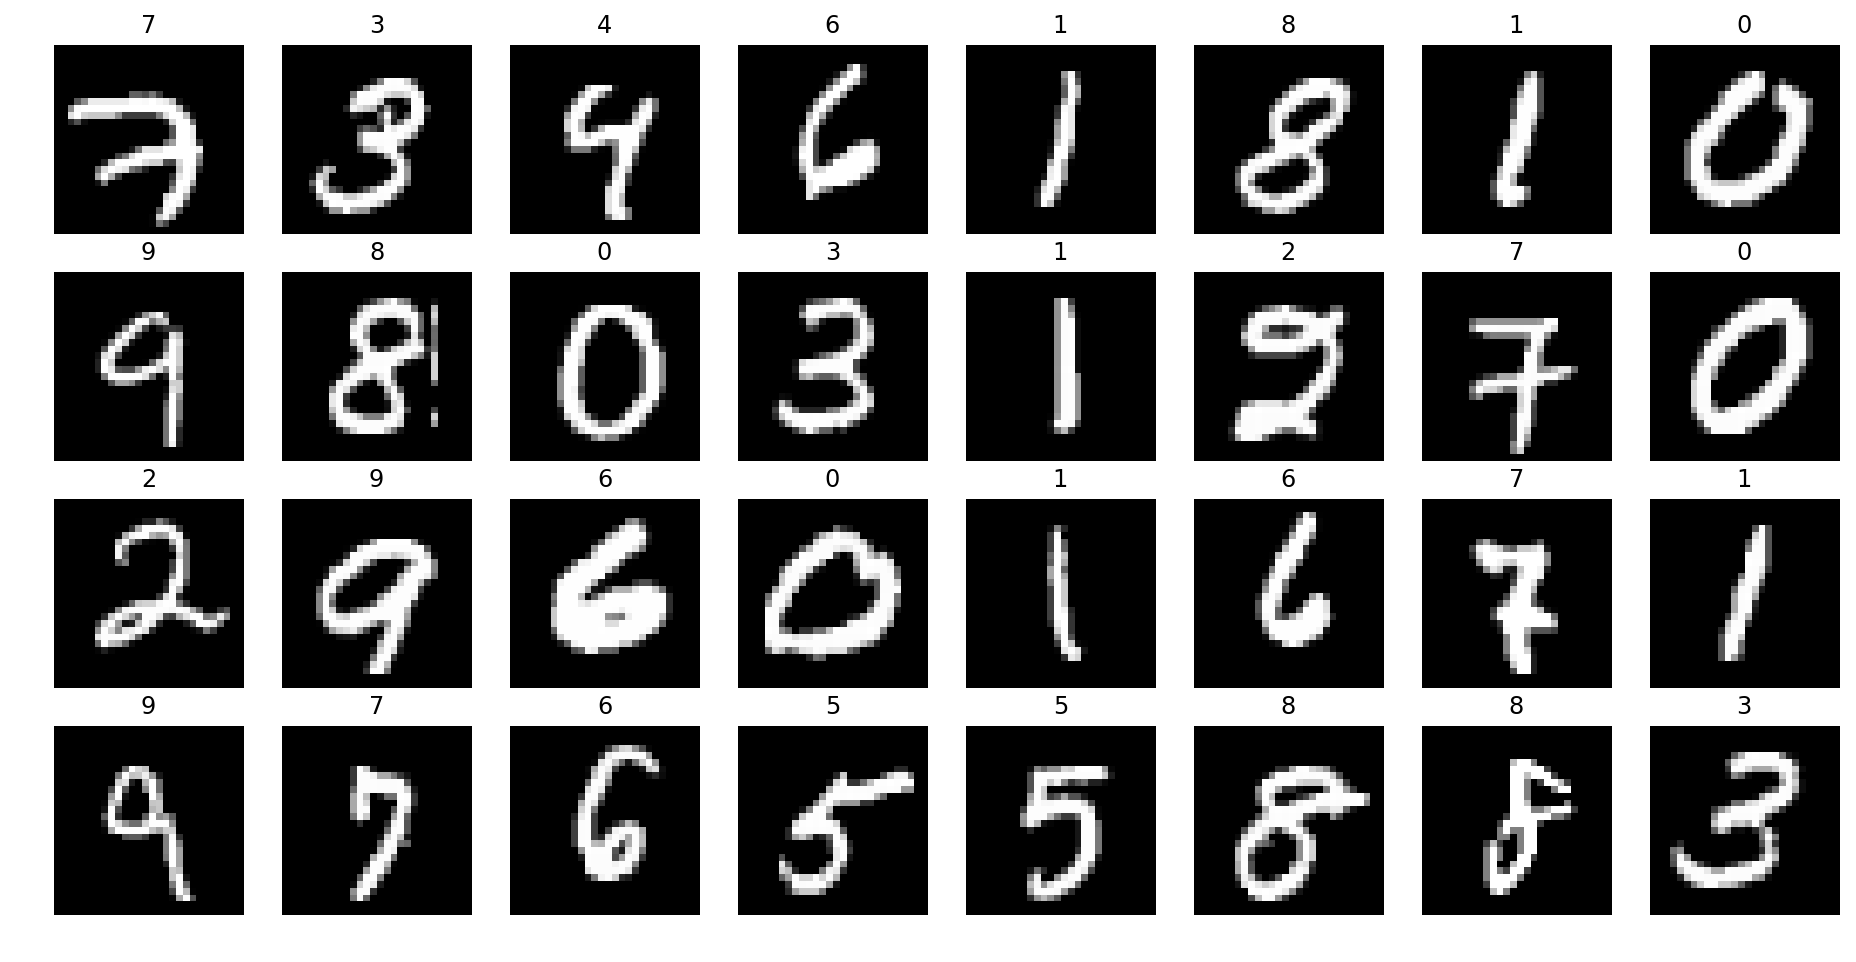

In [14]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()


In [15]:
# feature and label
features = mnist.train.images
labels = mnist.train.labels

In [16]:
num_hidden1 = 10

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))
rand_init = tf.random_normal_initializer(seed=624)
# hidden layer 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=rand_init,
                                            biases_initializer=rand_init)

# 필요시 hidden layer 추가

# output layer
logit =  tf.contrib.layers.fully_connected(hidden1, 10,
                                          activation_fn=None,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)

yhat = tf.nn.softmax(logit)

# accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# loss
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(y, logit))

In [17]:
# hyper parameter tuning
batch_size = 128
lr = 0.01
MaxEpochs = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

In [18]:
# training
tf.set_random_seed(624)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 200 == 0:
            curr_loss = sess.run(loss, feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")
    
final_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print("final acc: {}".format(final_acc))

0 0 4.453695 0.0783
0 200 0.81084645 0.769
0 400 0.53729874 0.8484

1 0 0.51548797 0.8557
1 200 0.44817352 0.8726
1 400 0.40114638 0.8839

2 0 0.3937724 0.8891
2 200 0.37023047 0.8918
2 400 0.33863062 0.8992

3 0 0.33412662 0.9015
3 200 0.3164946 0.9032
3 400 0.30418885 0.9089

4 0 0.30602866 0.9052
4 200 0.30145362 0.9096
4 400 0.283507 0.9106

5 0 0.28304625 0.9129
5 200 0.27250594 0.9166
5 400 0.2731519 0.9134

6 0 0.27443114 0.9114
6 200 0.27142337 0.9145
6 400 0.27484527 0.9124

7 0 0.261015 0.916
7 200 0.26043254 0.9154
7 400 0.25299966 0.9176

8 0 0.25614056 0.9132
8 200 0.24863589 0.9183
8 400 0.24538587 0.9187

9 0 0.24840297 0.9172
9 200 0.24529985 0.9159
9 400 0.24198711 0.9202

final acc: 0.9199000000953674
